In [23]:
from matplotlib import pyplot as plt
from pandas import read_excel, pivot_table
import numpy as np
import pandas as pd
from matplotlib import dates
import matplotlib.ticker as ticker



#### 문제 1
다음 데이터는 2021년 06월 01일부터 2023년 06월 30일까지의 비트코인 시세 데이터의 일부이다.<br>
이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. (단, x축의 간격을 10일 간격으로 설정하여 구현하시오.)



In [24]:
d1 = read_excel("https://data.hossam.kr/D01/bitcoin.xlsx")
d1

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


In [25]:
# 폰트 설정
plt.rcParams['font.family'] = "Malgun Gothic"  # 윈도우 전용

# 글자 크기
plt.rcParams["font.size"] = 12

# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (20, 5)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

In [26]:
y1= d1['시가']
y2 = d1['종가']
x = list(range(0,len(d1['날짜'])))
#### xticks 함수에서 사용할 x좌표 생성
xticks=list(range(0,len(d1['날짜']),30))
print(xticks)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750]


In [27]:
#### xticks 함수에서 출력할 날짜값 추출
date = []
print(type(d1['날짜'][0]))
for i in xticks:
    date.append(d1['날짜'][i].strftime('%y/%m/%d'))
print(date)


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
['21/06/01', '21/07/01', '21/07/31', '21/08/30', '21/09/29', '21/10/29', '21/11/28', '21/12/28', '22/01/27', '22/02/26', '22/03/28', '22/04/27', '22/05/27', '22/06/26', '22/07/26', '22/08/25', '22/09/24', '22/10/24', '22/11/23', '22/12/23', '23/01/22', '23/02/21', '23/03/23', '23/04/22', '23/05/22', '23/06/21']


In [28]:

# plt.figure()
# plt.title('날짜별 종가와 시가')
# plt.xlabel('날짜')
# plt.ylabel('가격' )
# plt.plot(x,y1, color = 'red',label = '시가')
# plt.plot(x,y2, color = 'blue', label = '종가')
# plt.xticks(x,xticks)  #  둘이 같은 길이어야 한다.
# plt.show() 


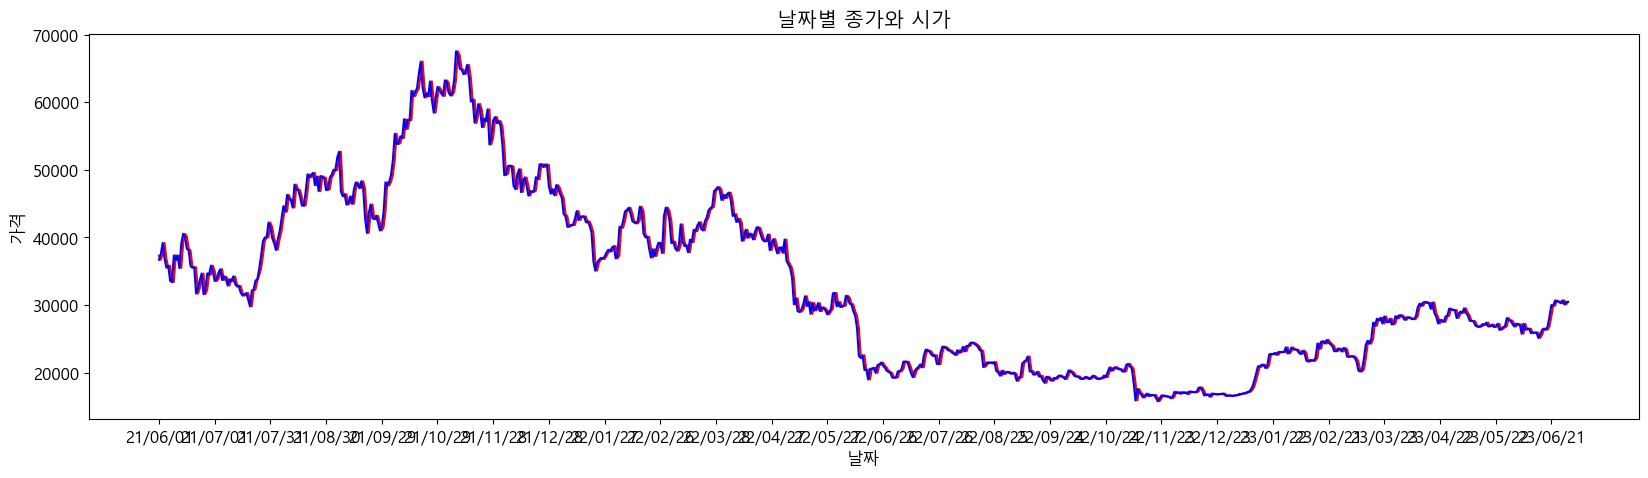

In [29]:
plt.figure()
plt.title('날짜별 종가와 시가')
plt.xlabel('날짜')
plt.ylabel('가격' )
plt.plot(x,y1, color = 'red',label = '시가')
plt.plot(x,y2, color = 'blue', label = '종가')
plt.xticks(xticks,date)  #  둘이 같은 길이어야 한다.
plt.show() 

#### 문제 2
복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오

In [30]:
q2 = read_excel('https://data.hossam.kr/D01/senior_lsf.xlsx')
q2

,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


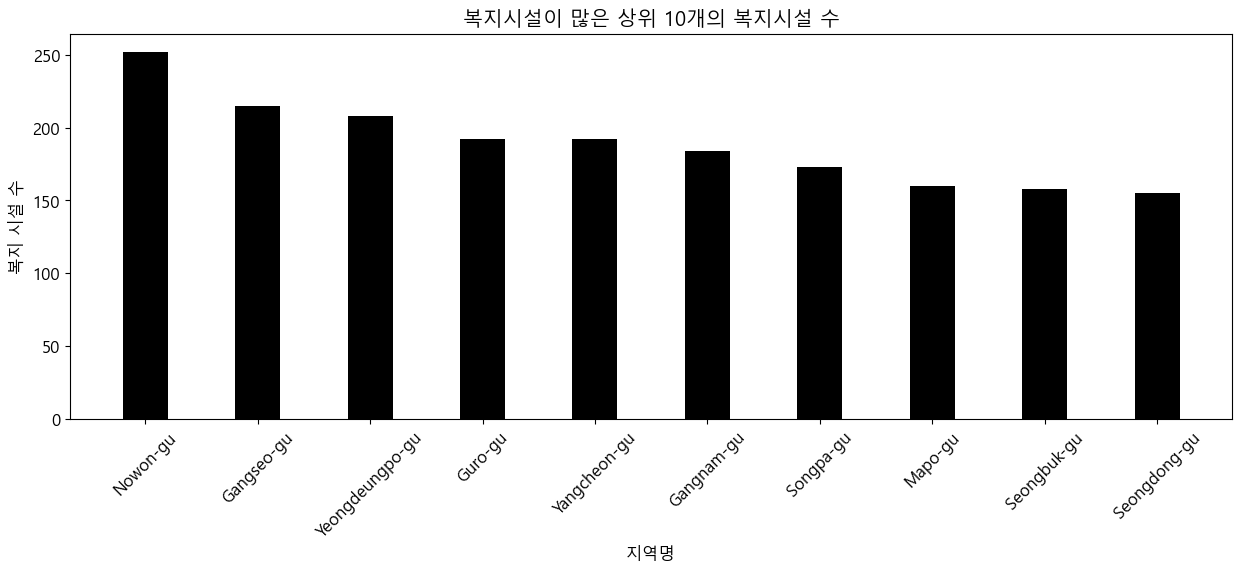

In [31]:
# rmfovm zmrl tjfwjd
plt.rcParams["figure.figsize"] = (15, 5)

d2 = q2.sort_values(by='복지시설', ascending=False).head(10)
x_values = d2['지역명']
y_values = d2['복지시설']
plt.figure()
plt.title('복지시설이 많은 상위 10개의 복지시설 수')
plt.bar(x_values,y_values, color = 'black', width= 0.4)
plt.xticks(rotation= 45)
plt.xlabel('지역명')
plt.ylabel('복지 시설 수')
plt.show()
plt.close()

#### 문제3
각 도시별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 하시오.

단, 인구수의 표현 범위는 200만~1000만으로 한다.

In [32]:
q3 = read_excel('https://data.hossam.kr/D01/city_people.xlsx')
q3

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [33]:
d3 = q3[q3['연도']!=2005]
# or
# d3 = q3.query('연도 == 2015' and '연도 == 2010')
pdf1 =pd.pivot_table(d3,index= "도시",columns= '연도',values='인구')
pdf1.index


Index(['부산', '서울', '인천'], dtype='object', name='도시')

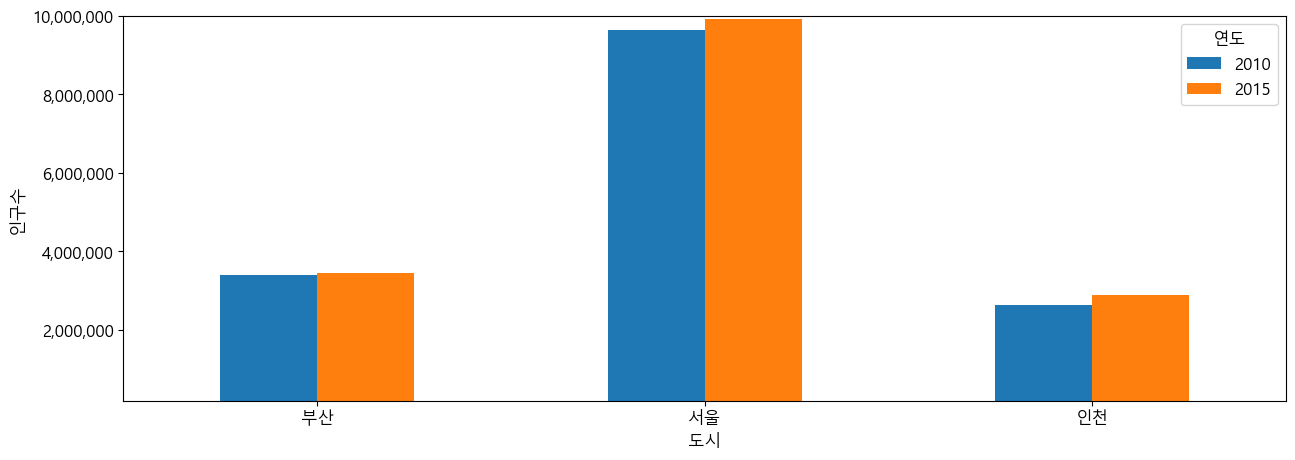

In [34]:
# 내 풀이
pdf1.plot(kind='bar', ylabel= '인구수',xlabel='도시', rot=0)
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(200000, 10000000)
plt.show()



In [35]:
# 강사님 풀이
d3 = q3.query('연도 == 2015' and '연도 == 2010')

x = np.array(range(0, len(d3.index)))
x

array([0, 1, 2])

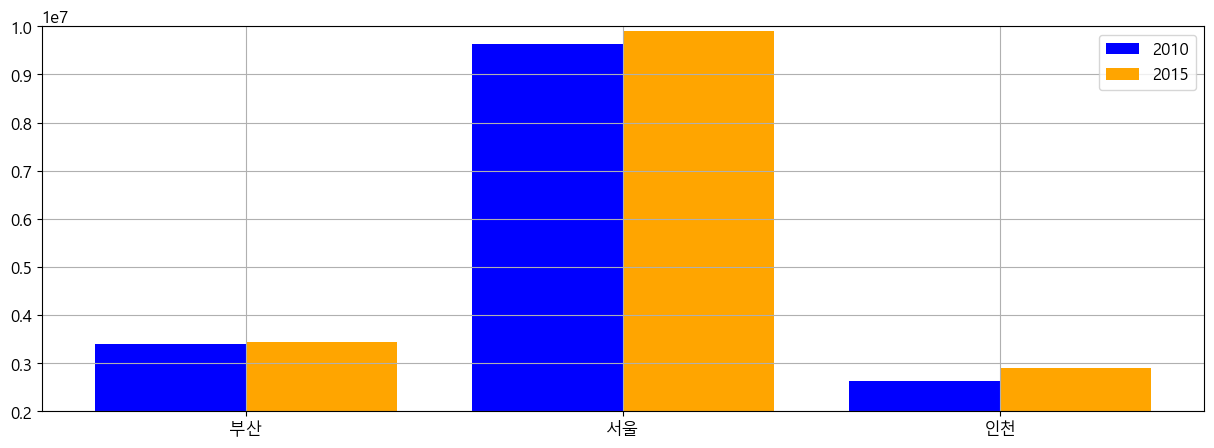

In [36]:
plt.figure()

plt.bar(x-0.2, pdf1[2010], color = "blue", label = '2010', width=0.4)
plt.bar(x+0.2, pdf1[2015], color = "orange", label = '2015', width=0.4)
plt.grid()
plt.legend()
plt.xticks(x,pdf1.index)
plt.ylim(2000000,10000000)
plt.show()
plt.close()

#### 문제 4
다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.
<br>
요구사항 1<br>
종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.
<br>
요구사항 2<br>
종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.



In [37]:
q4 = read_excel('https://data.hossam.kr/D01/jobs_by_scale.xlsx')
q4

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [38]:
# y1 = q4[2015]
# y2  = q4[2016]

# xlabels = list(q4['종사자규모별'])
# x = np.array(range(0,len(xlabels)))
# print(x)
# plt.xticks[x, xlabels]#[] 사용을 인식을 못하는 데 사용하는 경우 이런 에러가 발생한다.



[0 1 2 3 4 5 6 7 8]


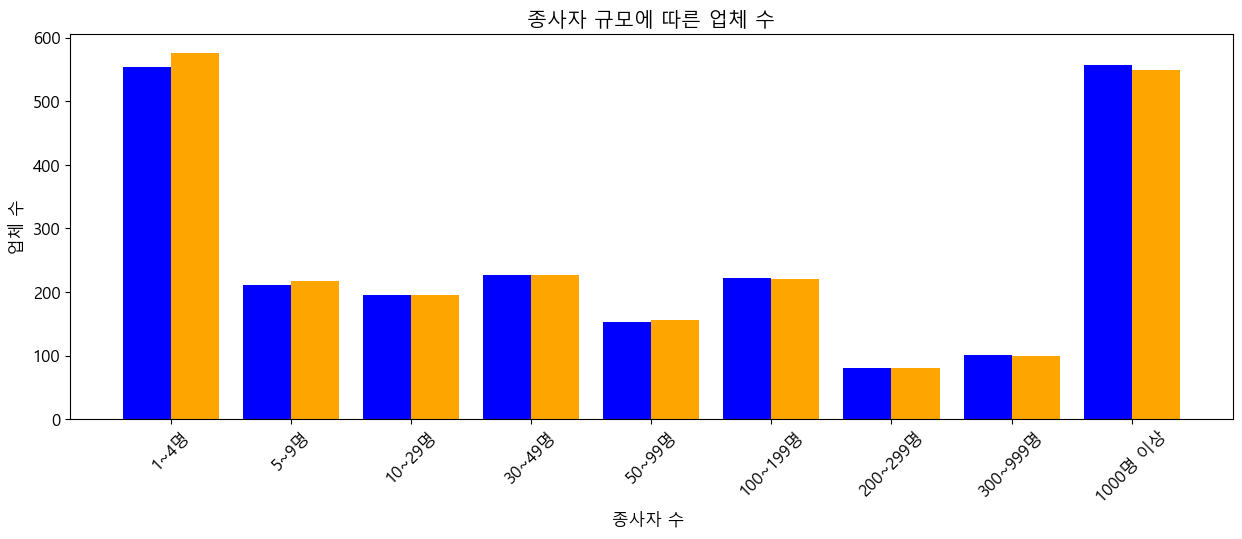

In [39]:
y1 = q4[2015]
y2  = q4[2016]

xlabels = list(q4['종사자규모별'])
x = np.array(range(0,len(xlabels)))
print(x)
plt.title('종사자 규모에 따른 업체 수')
plt.xticks(x,xlabels, rotation = 45)
plt.xlabel('종사자 수 ')
plt.ylabel('업체 수')
plt.bar(x-0.2, y1, color="blue", label= '2015', width= 0.4)
plt.bar(x+0.2, y2, color="orange", label= '2016', width= 0.4)

plt.show()

In [40]:
data1= q4[2015]
data2 = q4[2016]
labels = q4['종사자규모별']


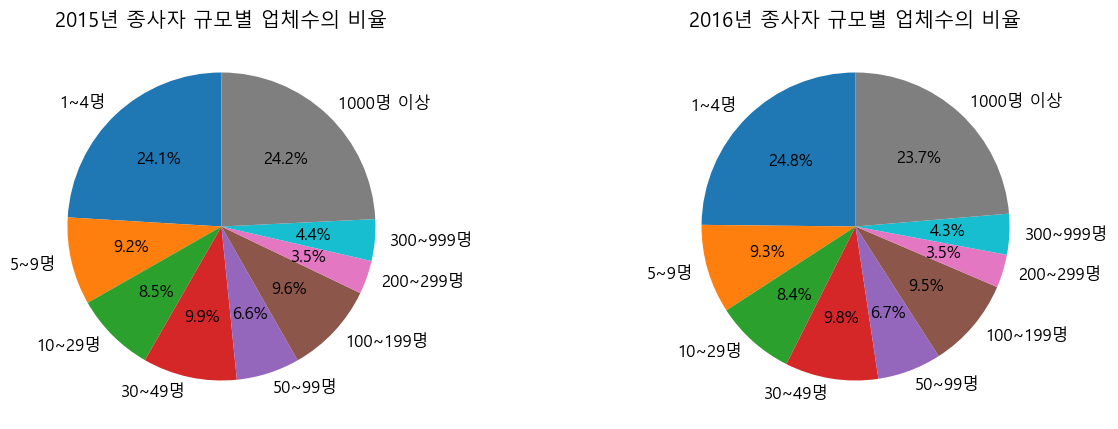

In [41]:

plt.figure()
plt.subplot(1, 2, 1)
plt.title('2015년 종사자 규모별 업체수의 비율')
plt.pie(data1, labels= labels, autopct = '%0.1f%%', startangle=90,colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf', '#7f7f7f'])

plt.subplot(1, 2, 2)
plt.title('2016년 종사자 규모별 업체수의 비율')
plt.pie(data2, labels = labels, autopct = '%0.1f%%', startangle=90 ,colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf', '#7f7f7f'])

plt.show()
plt.close()

#### 문제 5
교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.

In [42]:
q5 = read_excel('https://data.hossam.kr/D01/traffic_acc.xlsx')
q5

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


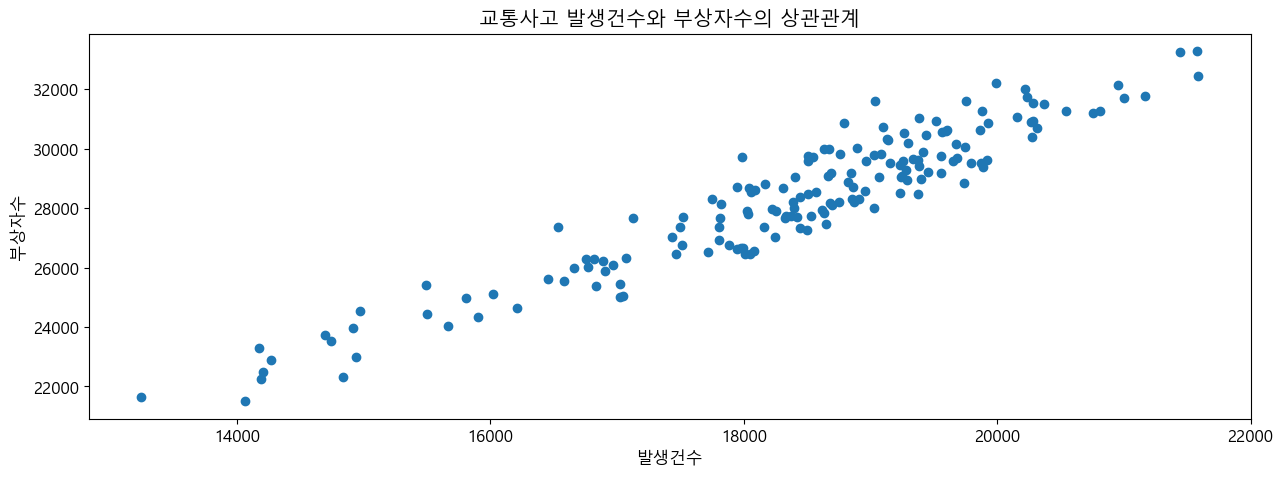

In [43]:
x = q5['발생건수']
y = q5['부상자수']
plt.figure()
plt.title("교통사고 발생건수와 부상자수의 상관관계")
plt.scatter(x,y)  
plt.xlabel('발생건수')
plt.ylabel('부상자수') 
plt.show()

In [44]:
z= np.polyfit(x,y,1)
z
print('기울기(가중치)= %f' % z[0])
print('y절편(편향) = %f'  % z[1])
print('f(x) = %f * x + %f' % (z[0],z[1]))

# y 절편 = Prediction bias
# Prediction bias = average of predictions - average of labels in data set

기울기(가중치)= 1.404418
y절편(편향) = 2495.338547
f(x) = 1.404418 * x + 2495.338547
